  0%|          | 0/171 [00:00<?, ?it/s]

ANALYZING ABBA


 33%|███▎      | 56/171 [00:29<01:25,  1.35it/s]

I Have a Dream.mid: list index out of range


 39%|███▊      | 66/171 [00:32<00:49,  2.11it/s]

I've Been Waiting For You.mid: data byte must be in range 0..127


 66%|██████▌   | 113/171 [00:56<00:37,  1.55it/s]

One Of Us.mid: data byte must be in range 0..127


  0%|          | 0/157 [00:00<?, ?it/s]

COMPLETED ABBA
ANALYZING Metallica
(Anesthesia)-Pulling Teeth.mid: 


 20%|█▉        | 31/157 [00:21<01:22,  1.53it/s]

Dont Tread on Me.mid: list index out of range


 96%|█████████▌| 150/157 [01:52<00:04,  1.58it/s]

Wherever I May Roam.mid: list index out of range


  0%|          | 0/16 [00:00<?, ?it/s]

COMPLETED Metallica
ANALYZING AC DC
Back In Black.mid: list index out of range


 50%|█████     | 8/16 [00:05<00:06,  1.31it/s]

TNT.mid: list index out of range


  0%|          | 0/783 [00:00<?, ?it/s]

COMPLETED AC DC
ANALYZING The Beatles


  7%|▋         | 55/783 [00:31<07:45,  1.56it/s]

Baby's In Black.mid: list index out of range


 16%|█▌        | 124/783 [01:17<05:25,  2.02it/s]

Dear Santa (Oh Darlin).mid: list index out of range


 22%|██▏       | 172/783 [01:50<03:57,  2.57it/s]

Every Little Thing.mid: data byte must be in range 0..127


 23%|██▎       | 181/783 [01:52<03:19,  3.02it/s]

Fixing a Hole.mid: data byte must be in range 0..127


 24%|██▍       | 187/783 [01:54<03:04,  3.23it/s]

Fool on the Hill.mid: data byte must be in range 0..127


 35%|███▌      | 275/783 [02:36<03:27,  2.45it/s]

Hey Jude.mid: list index out of range


 58%|█████▊    | 452/783 [04:24<03:55,  1.40it/s]

Love Me Do.mid: list index out of range


 65%|██████▍   | 507/783 [05:00<01:46,  2.59it/s]

Norwegian Wood.mid: list index out of range


 67%|██████▋   | 523/783 [05:05<00:58,  4.46it/s]

Ob-La-Di, Ob-La-Da.mid: list index out of range
Octopus's Garden.mid: data byte must be in range 0..127


 68%|██████▊   | 529/783 [05:05<00:39,  6.51it/s]

Oh! Darling.mid: list index out of range


 68%|██████▊   | 533/783 [05:05<00:32,  7.75it/s]

Old Brown Shoe.mid: list index out of range


 87%|████████▋ | 685/783 [07:01<01:01,  1.59it/s]

This Boy.mid: list index out of range


 96%|█████████▌| 749/783 [07:29<00:11,  3.00it/s]

Yer Blues.mid: list index out of range
Yes It Is.mid: list index out of range
Yesterday.mid: list index out of range


 99%|█████████▉| 778/783 [07:43<00:02,  1.94it/s]

You've Got to Hide Your Love Away.mid: list index out of range


100%|██████████| 783/783 [07:48<00:00,  1.67it/s]


COMPLETED The Beatles


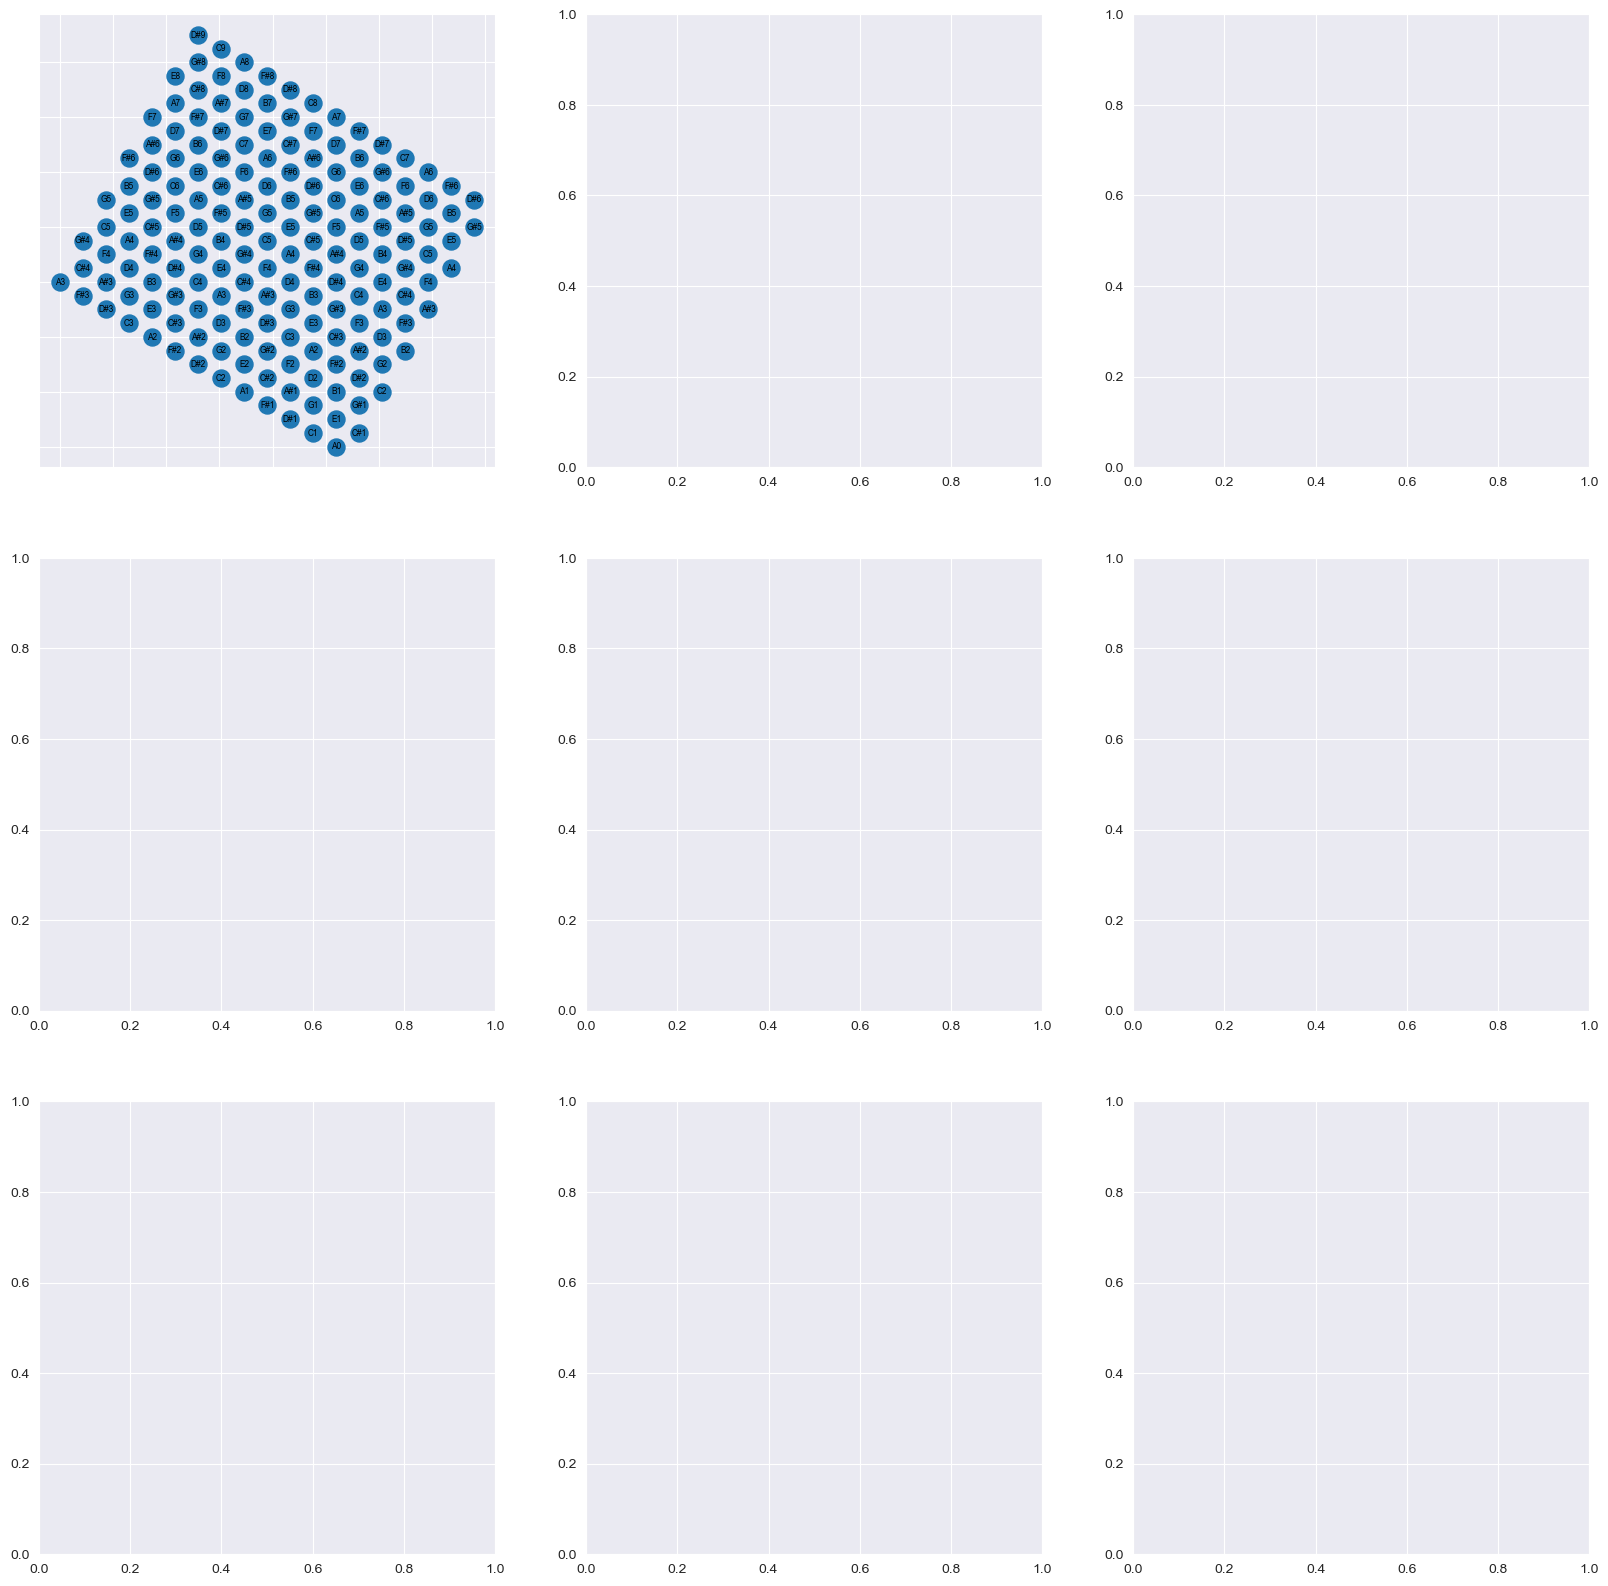

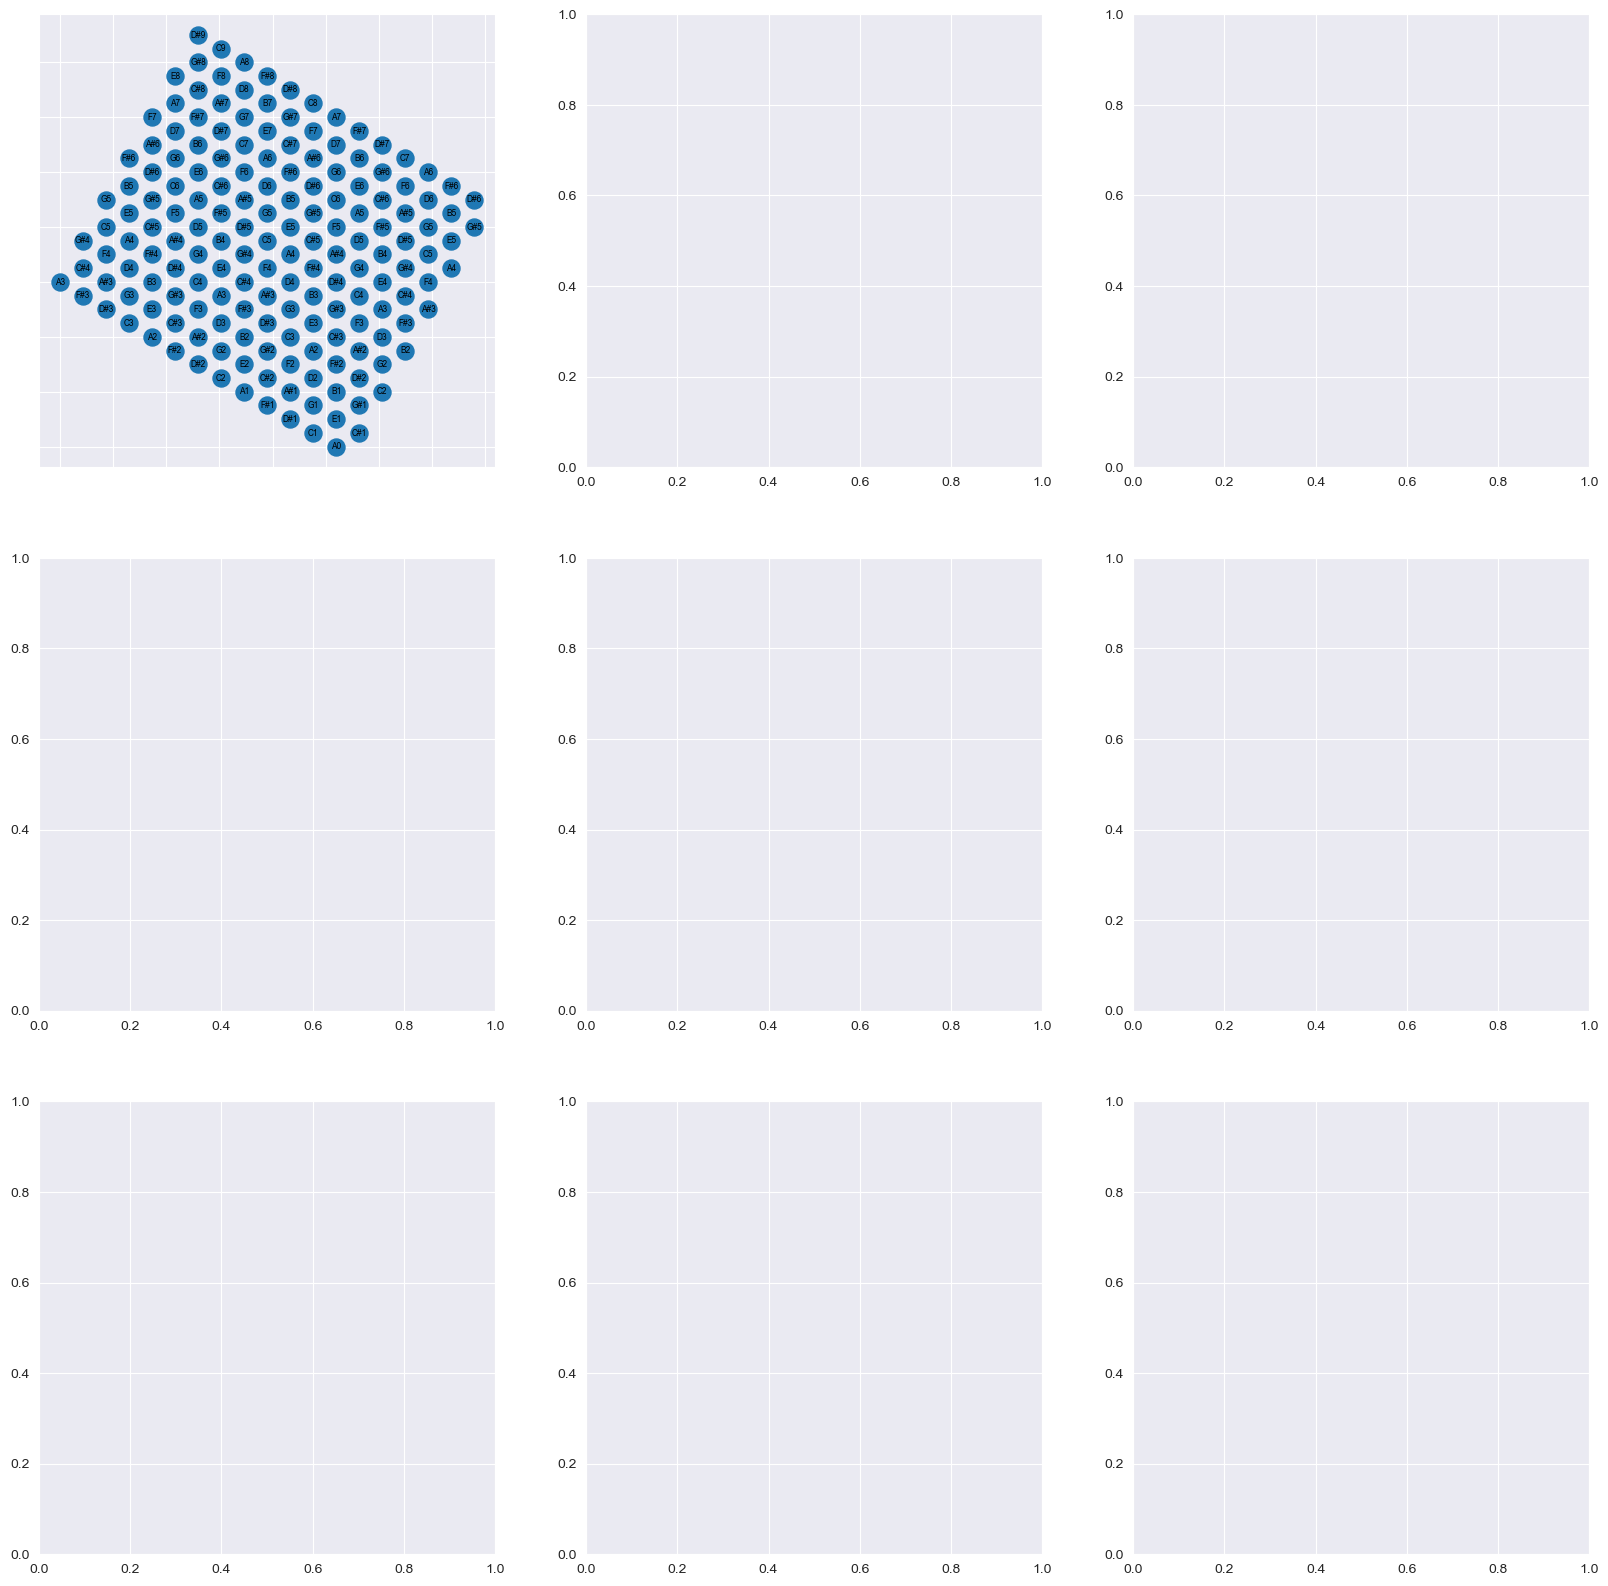

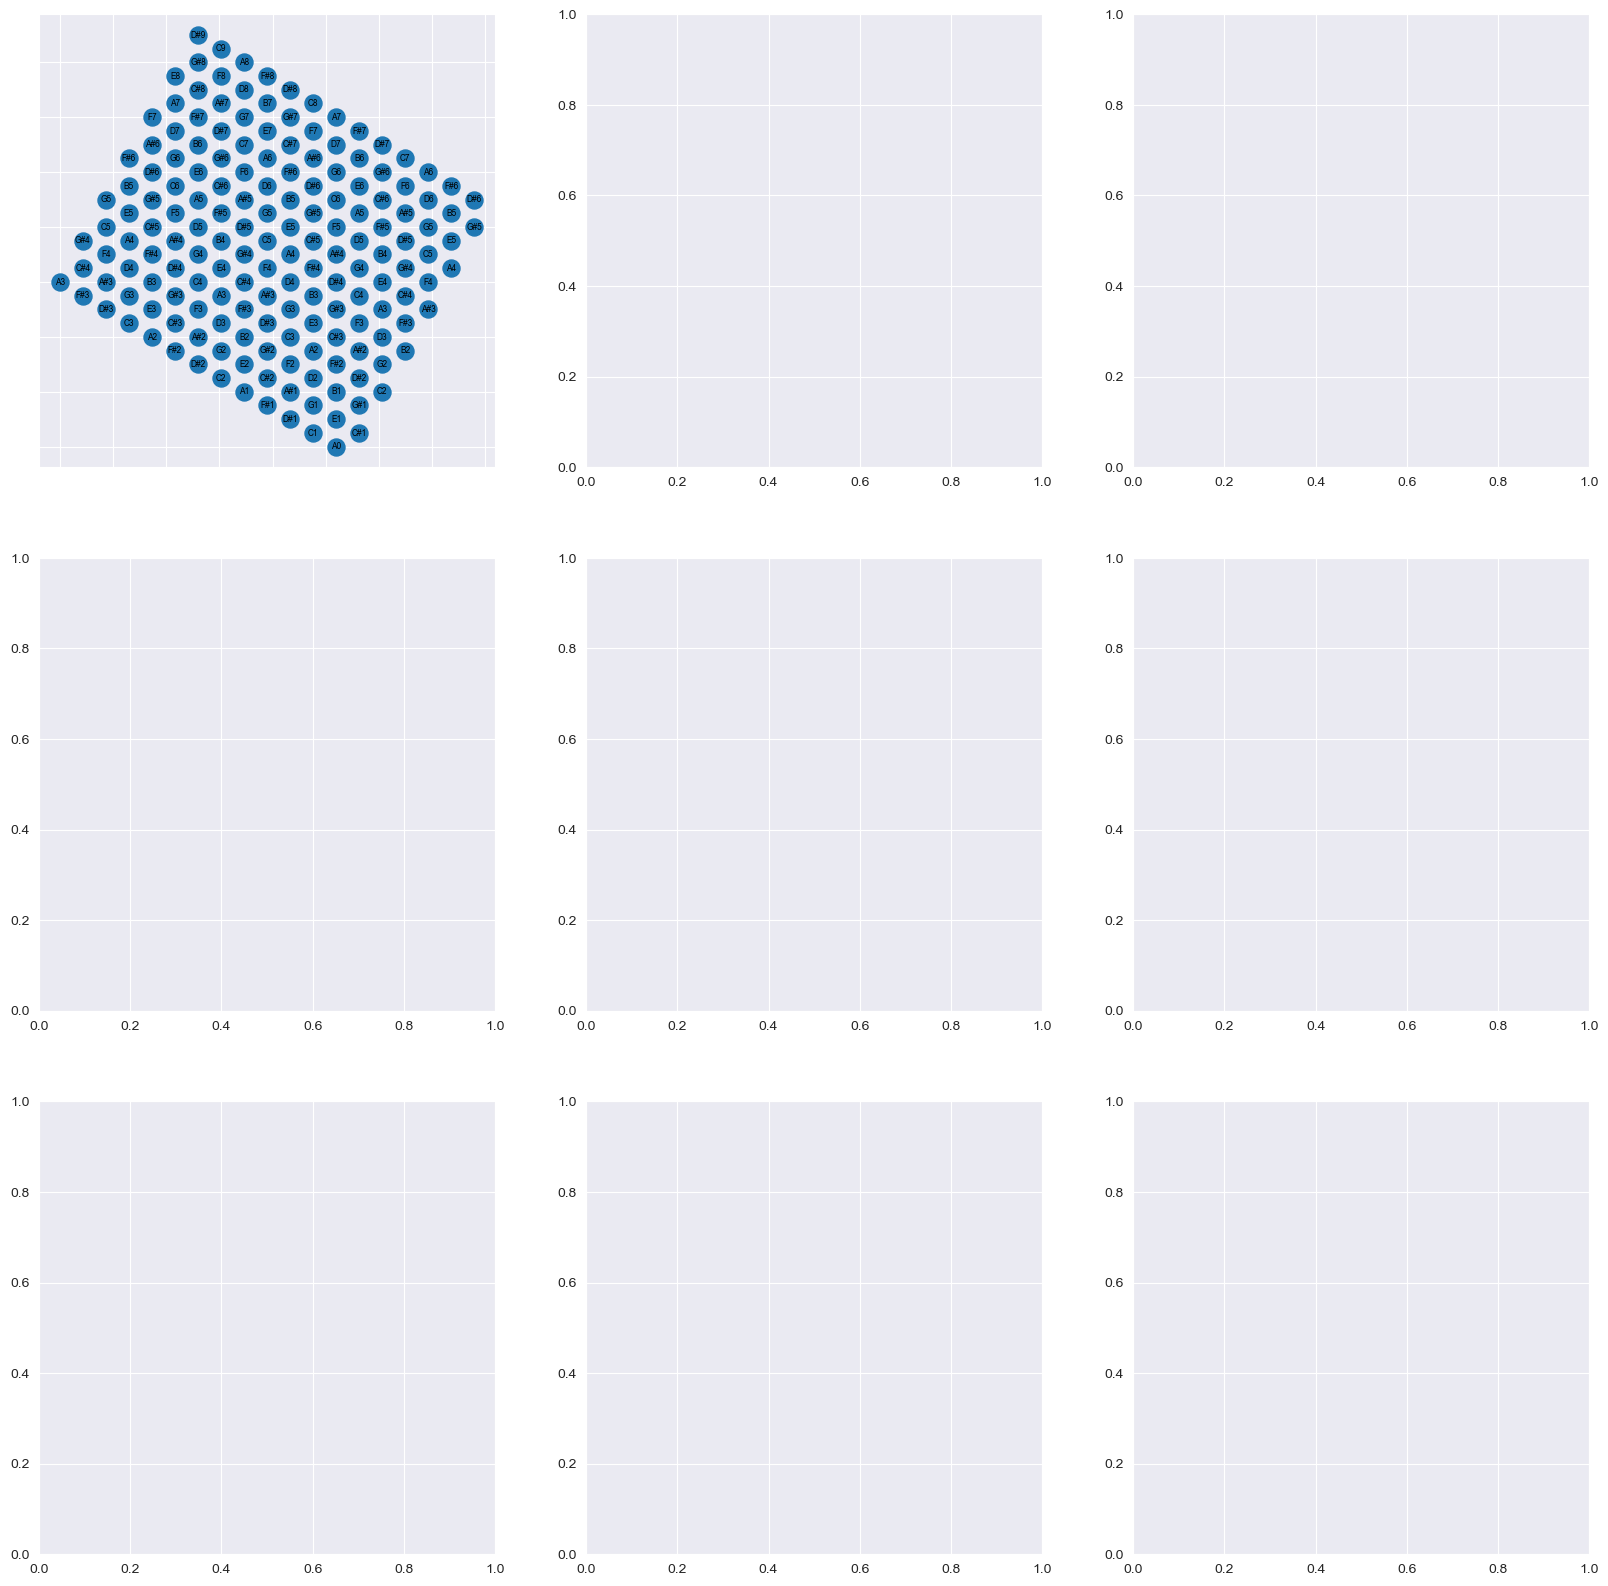

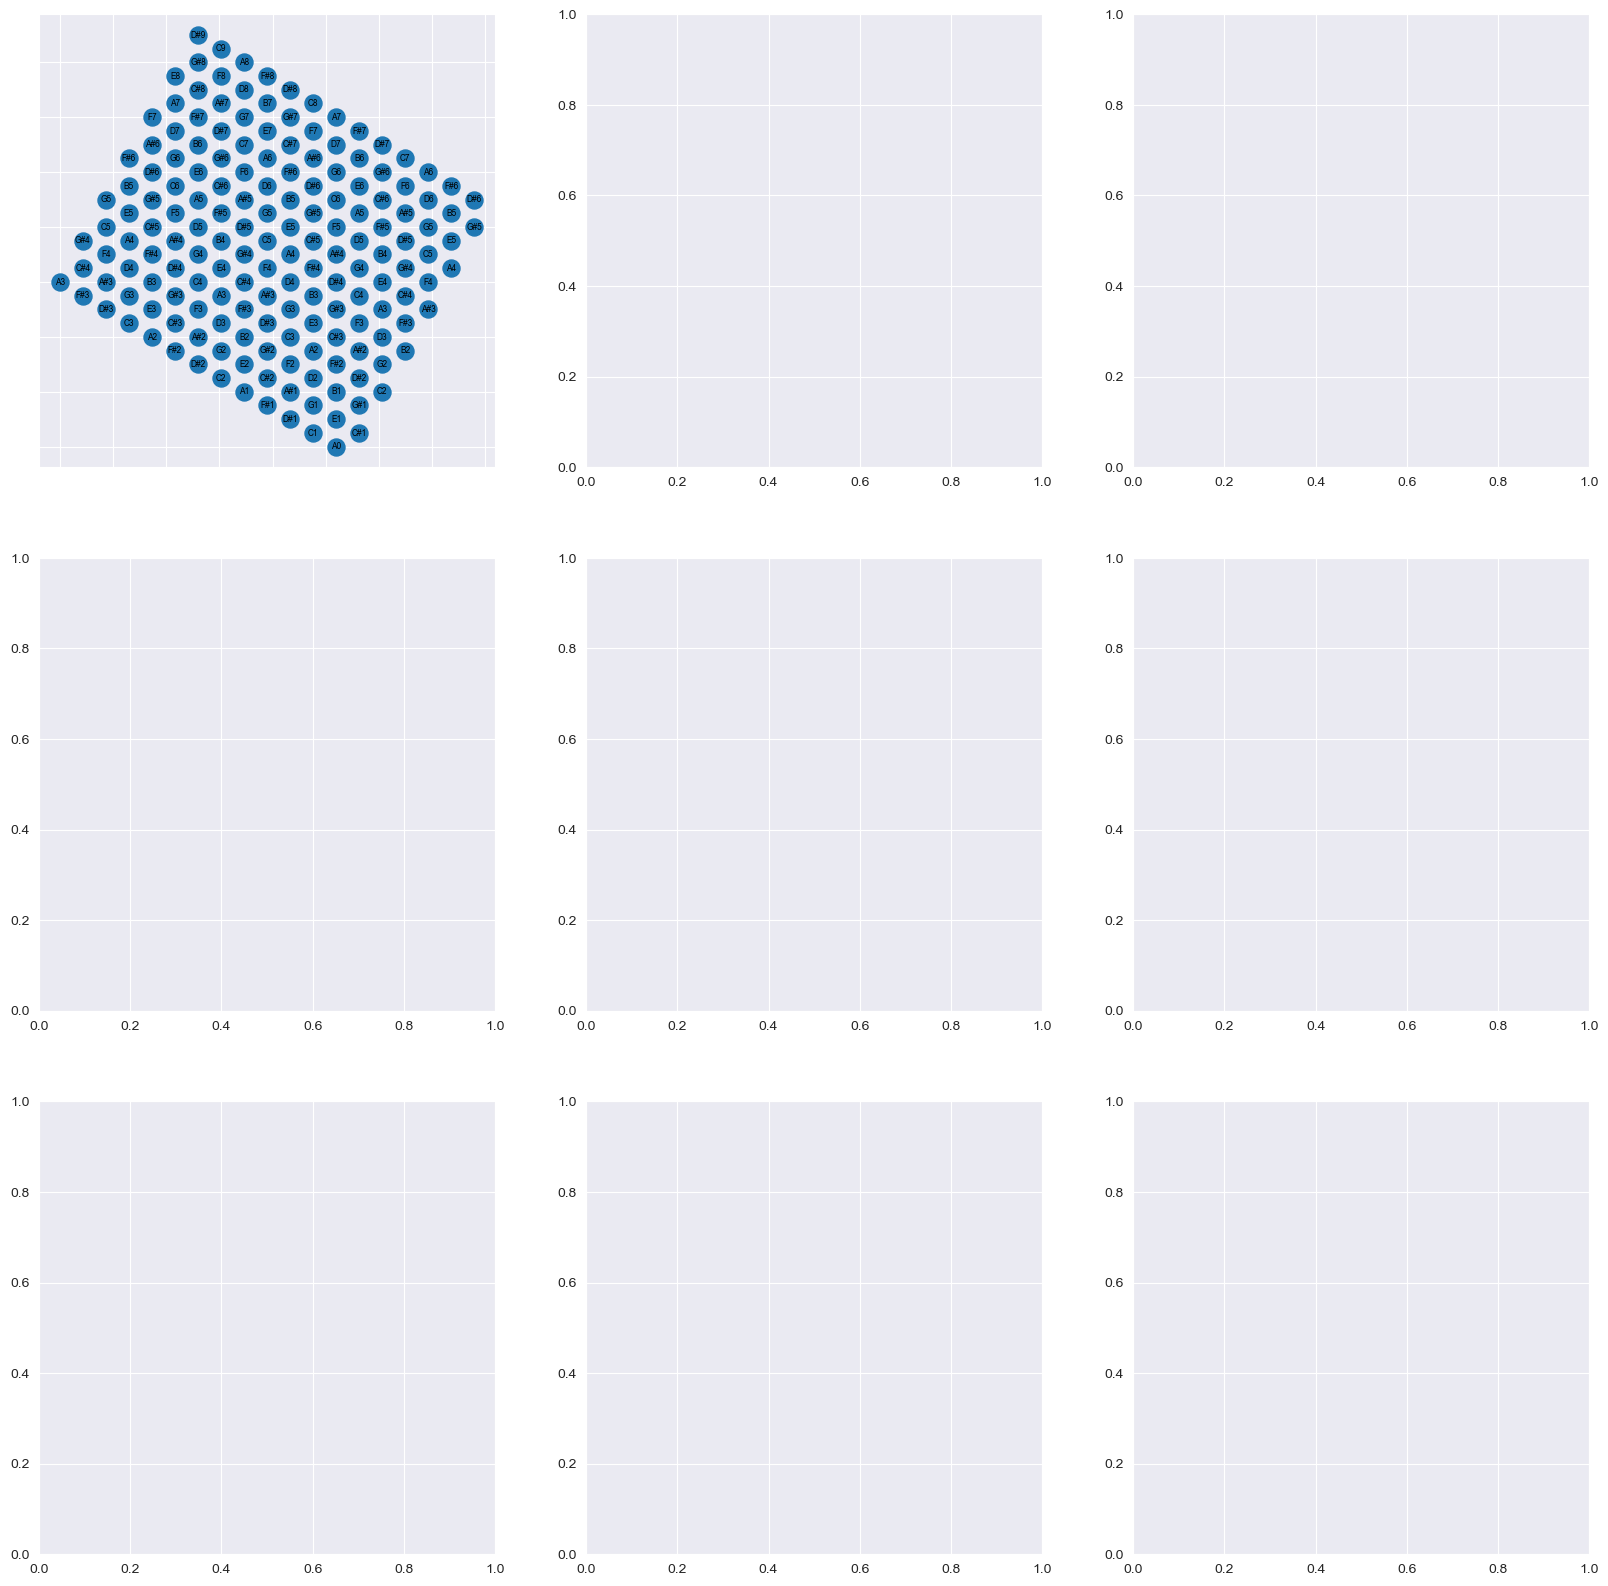

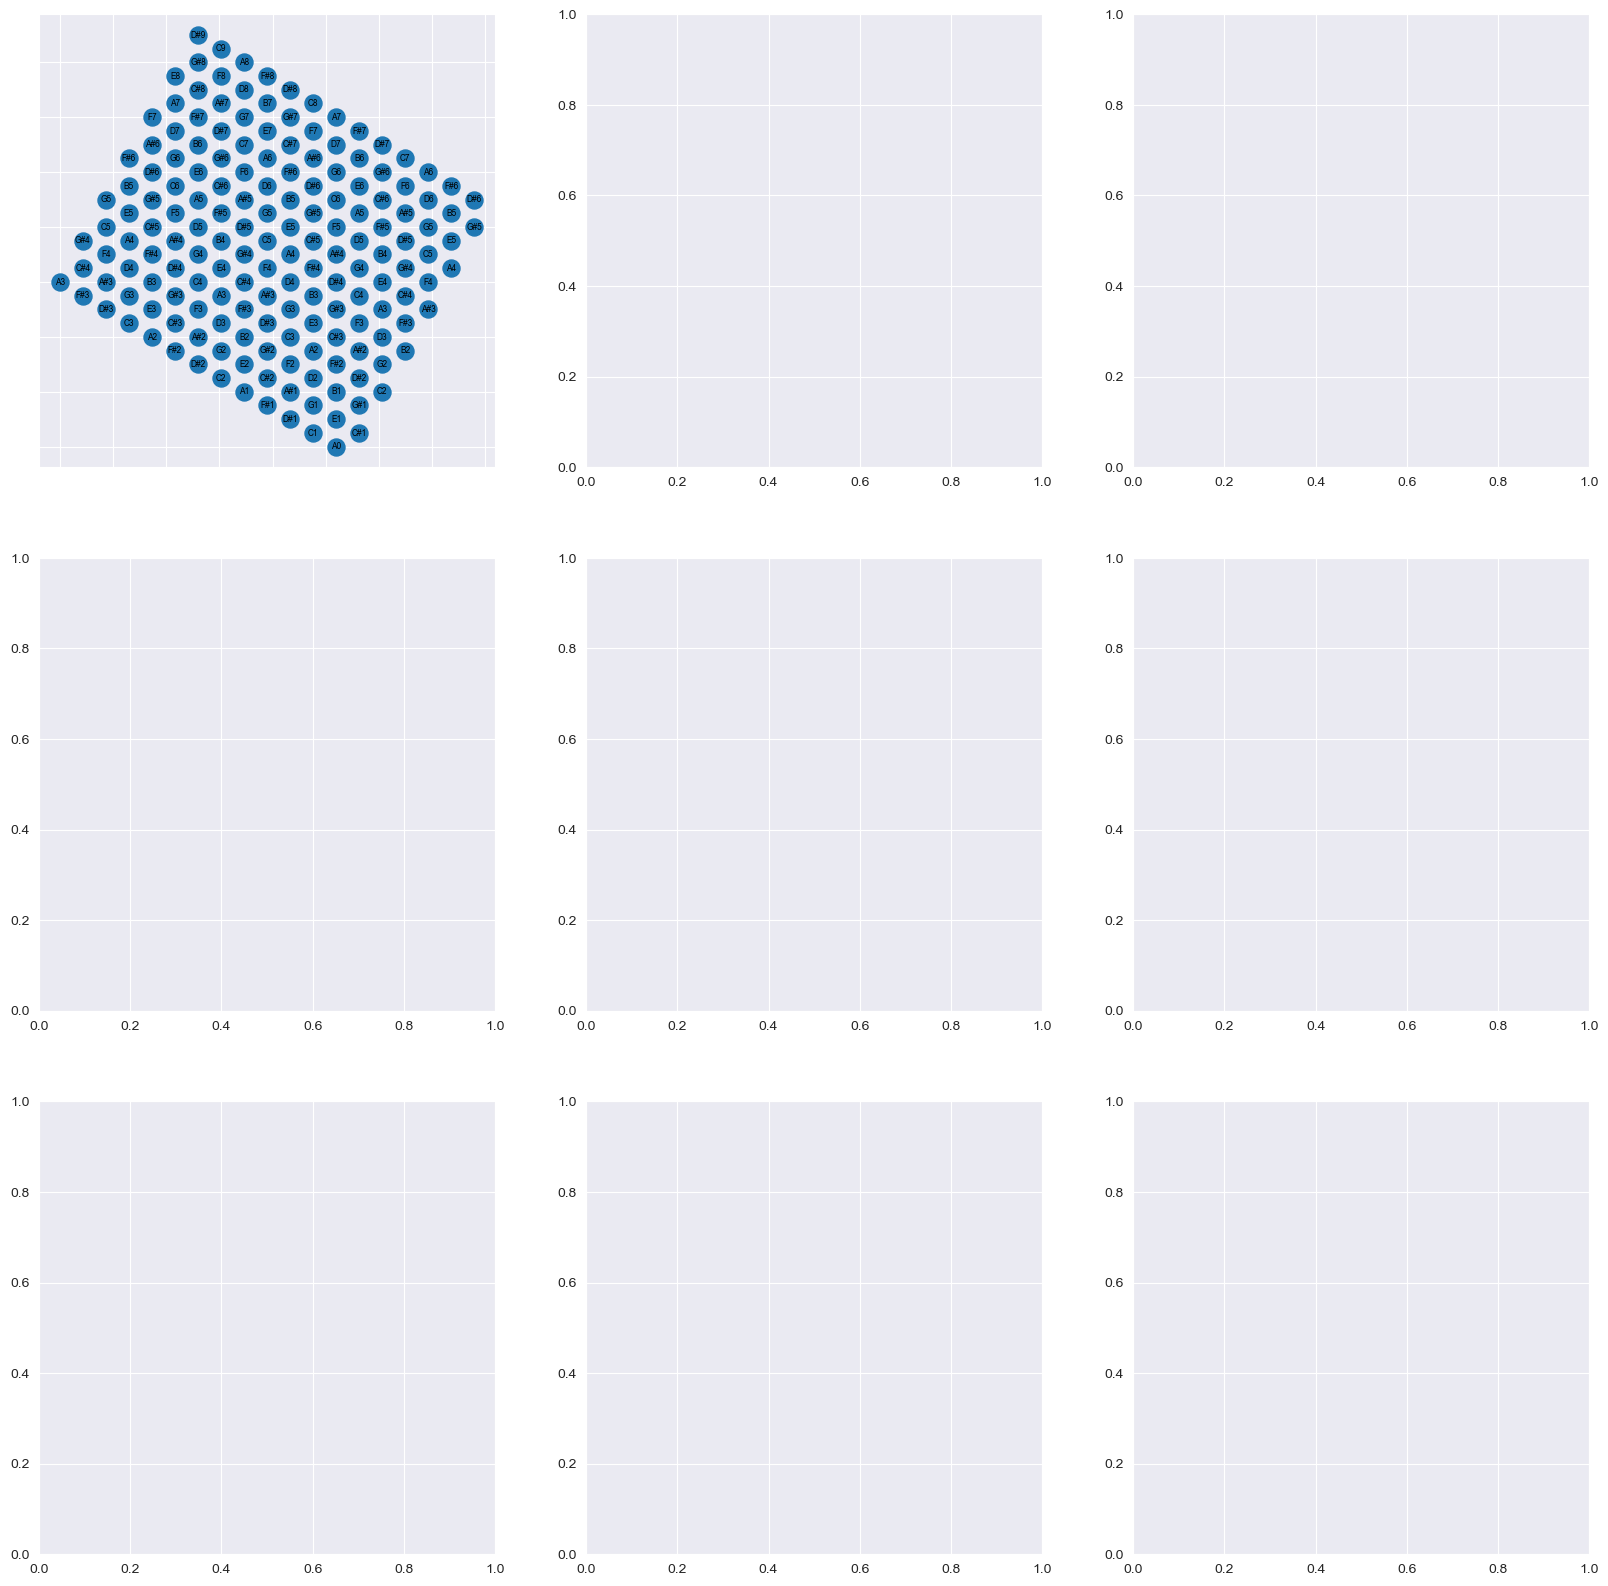

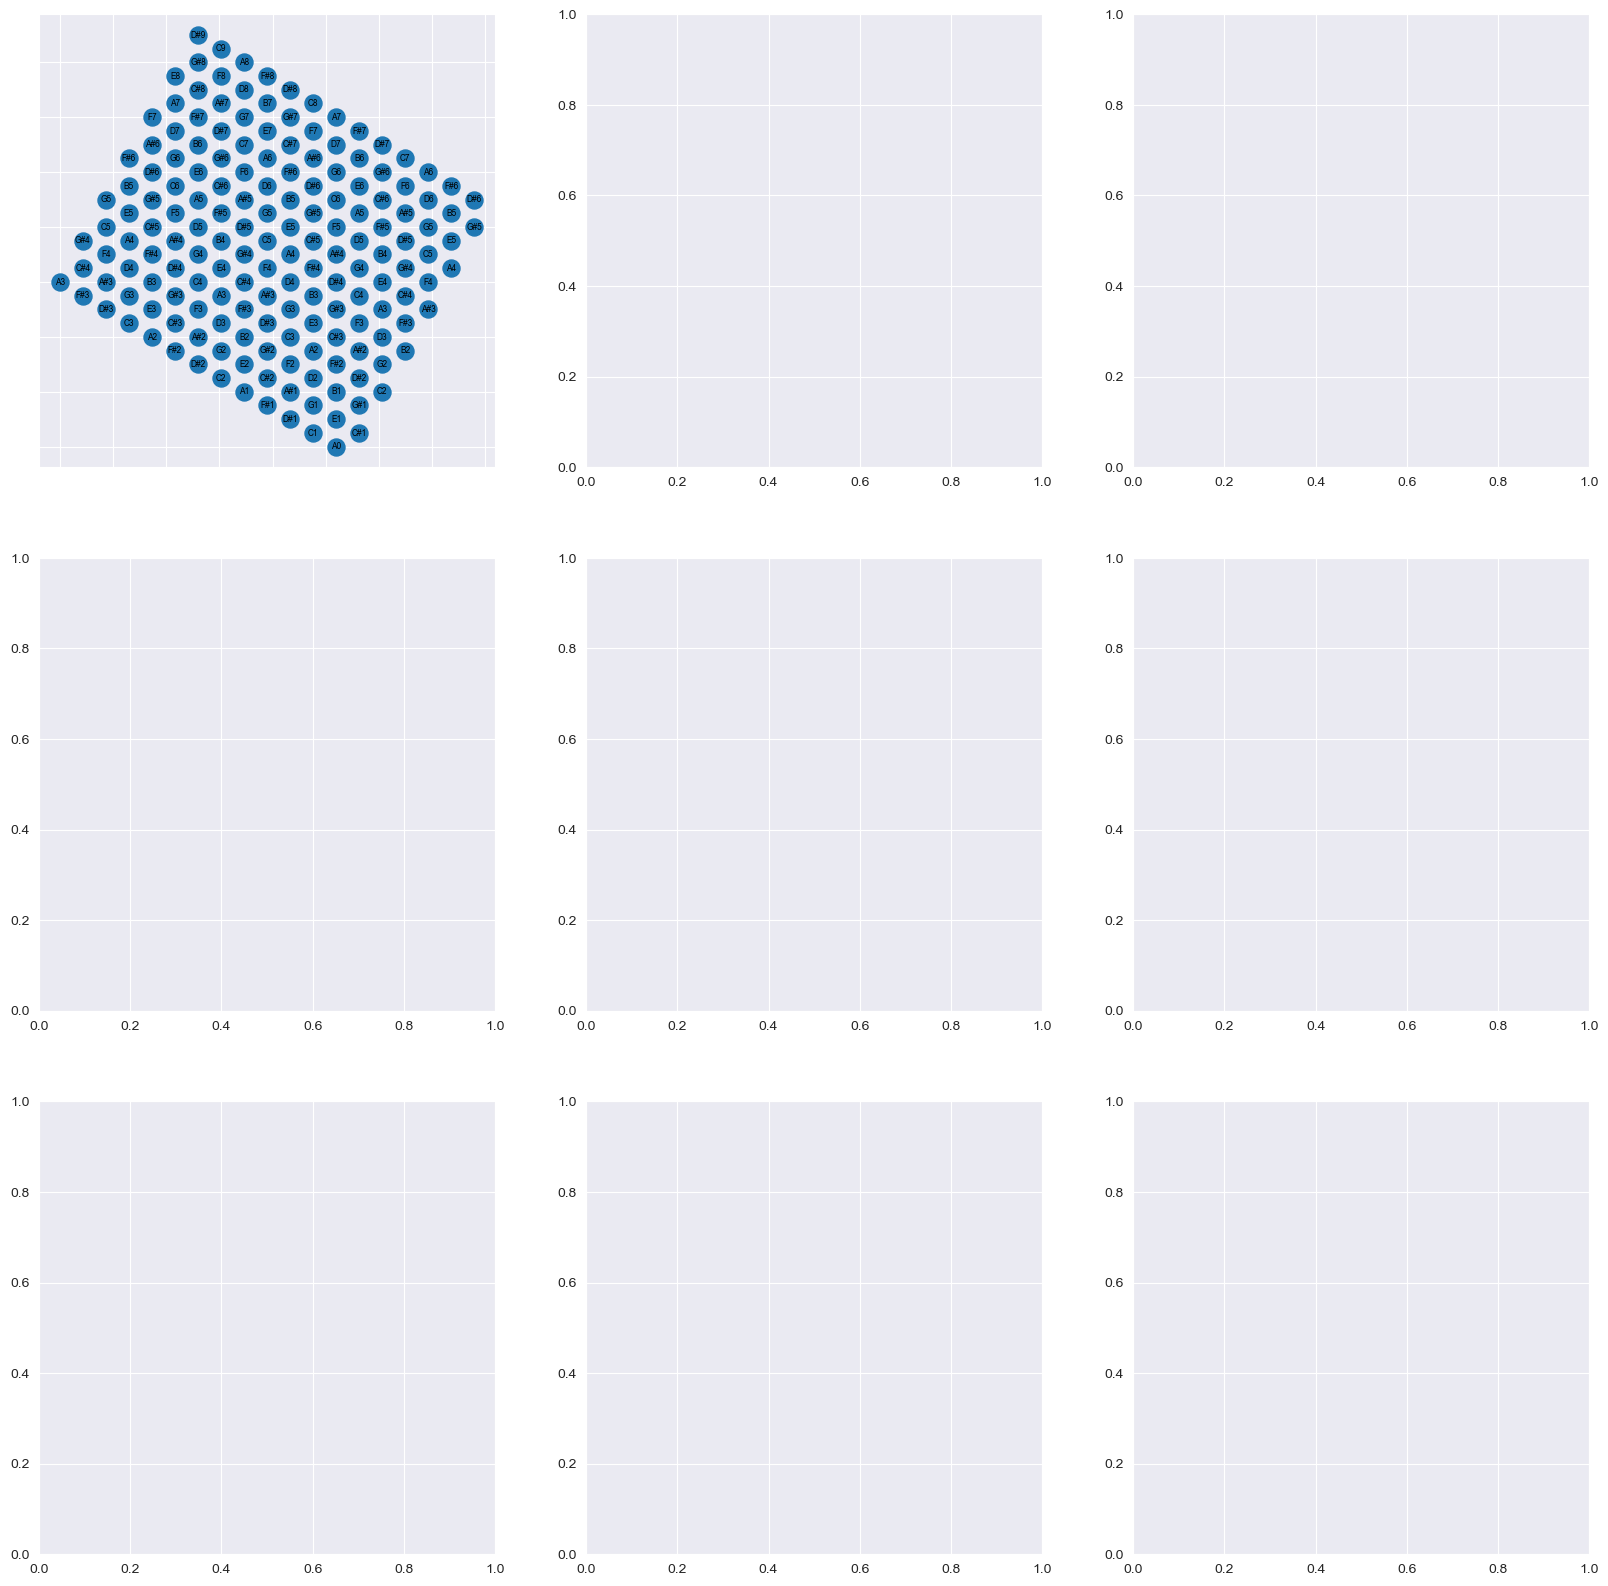

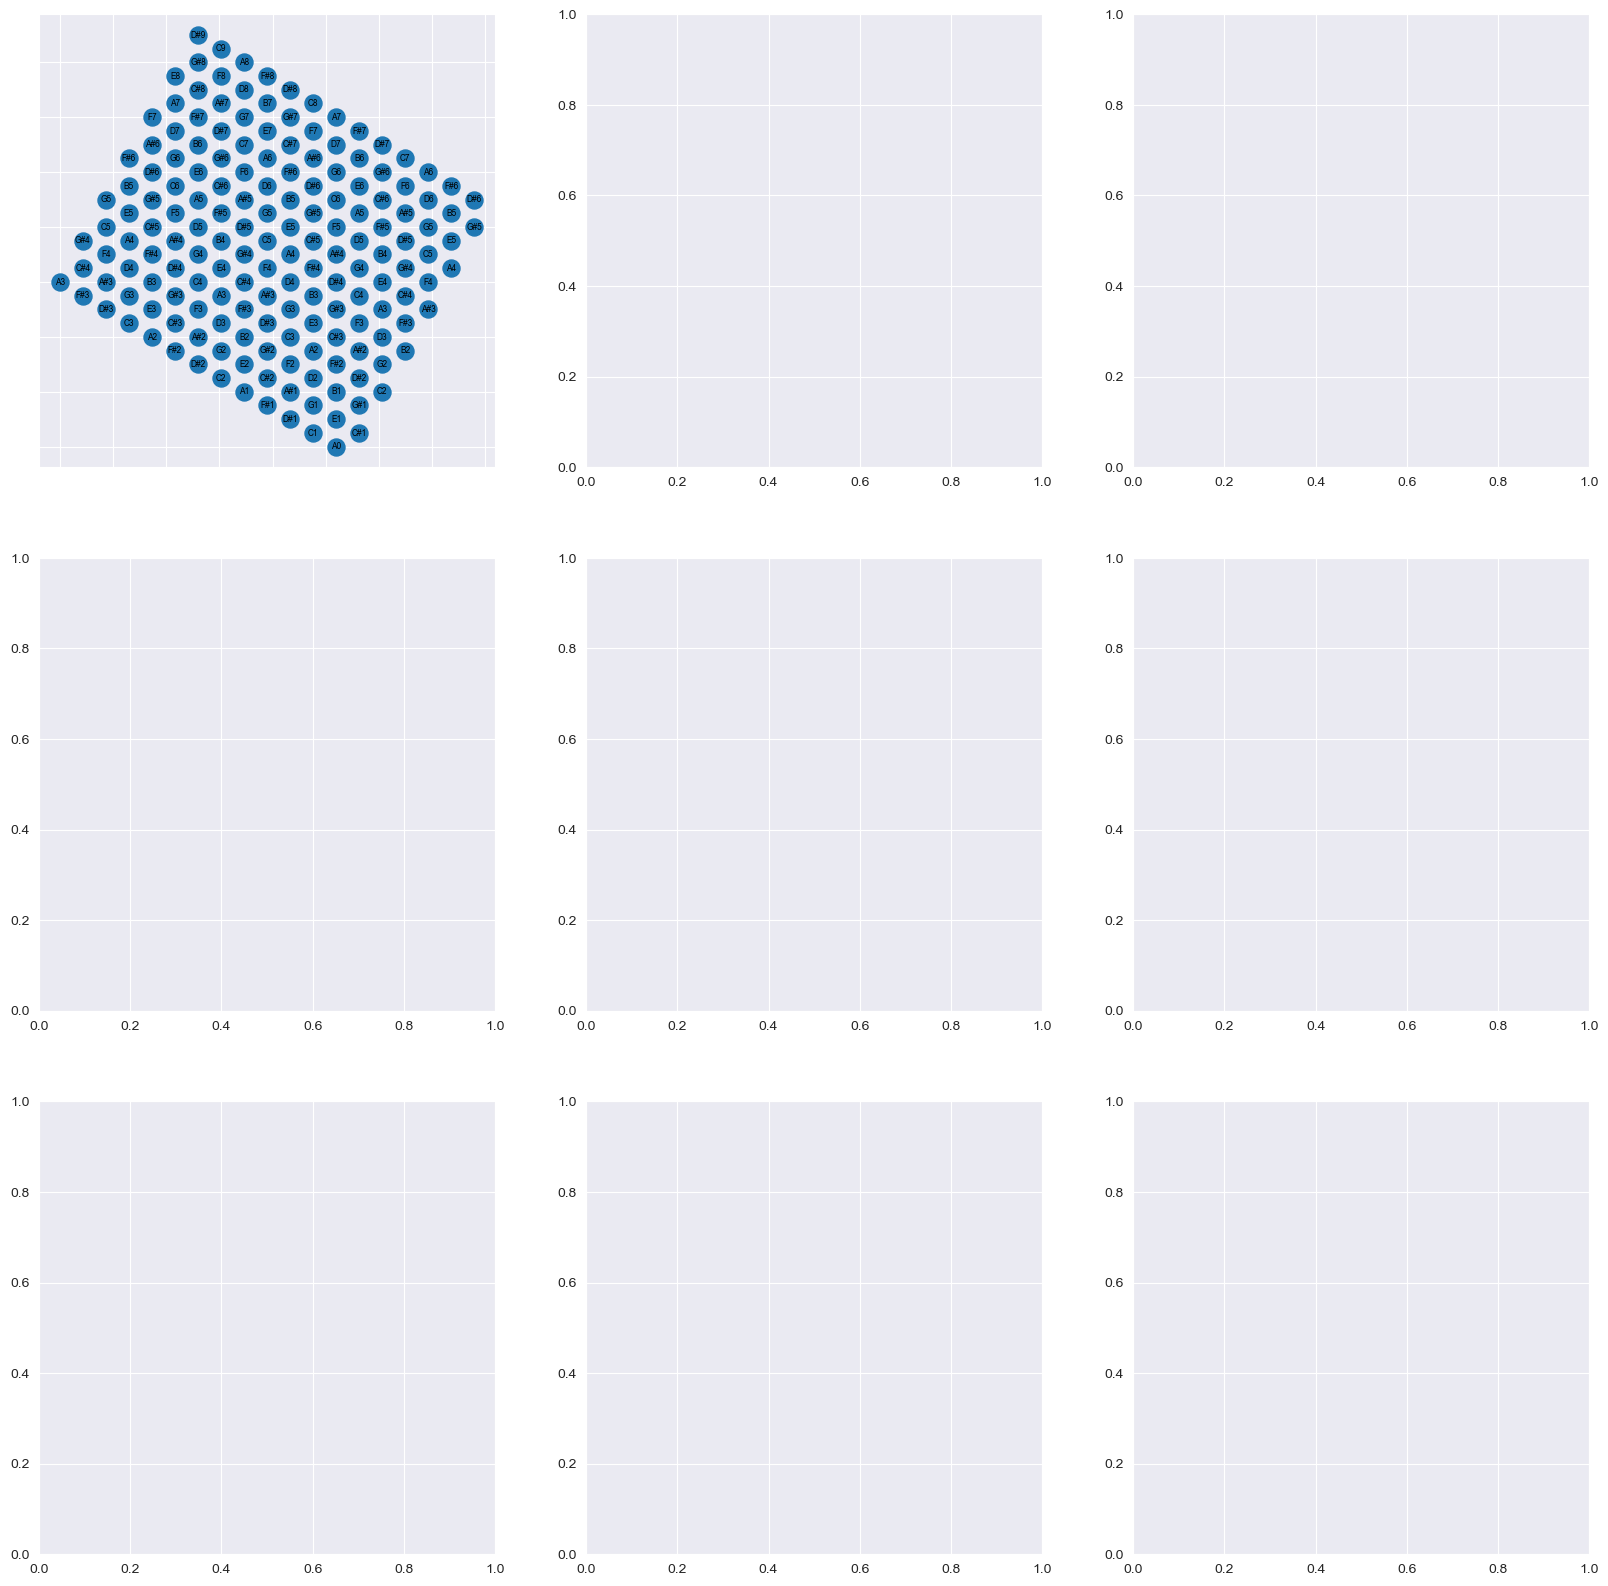

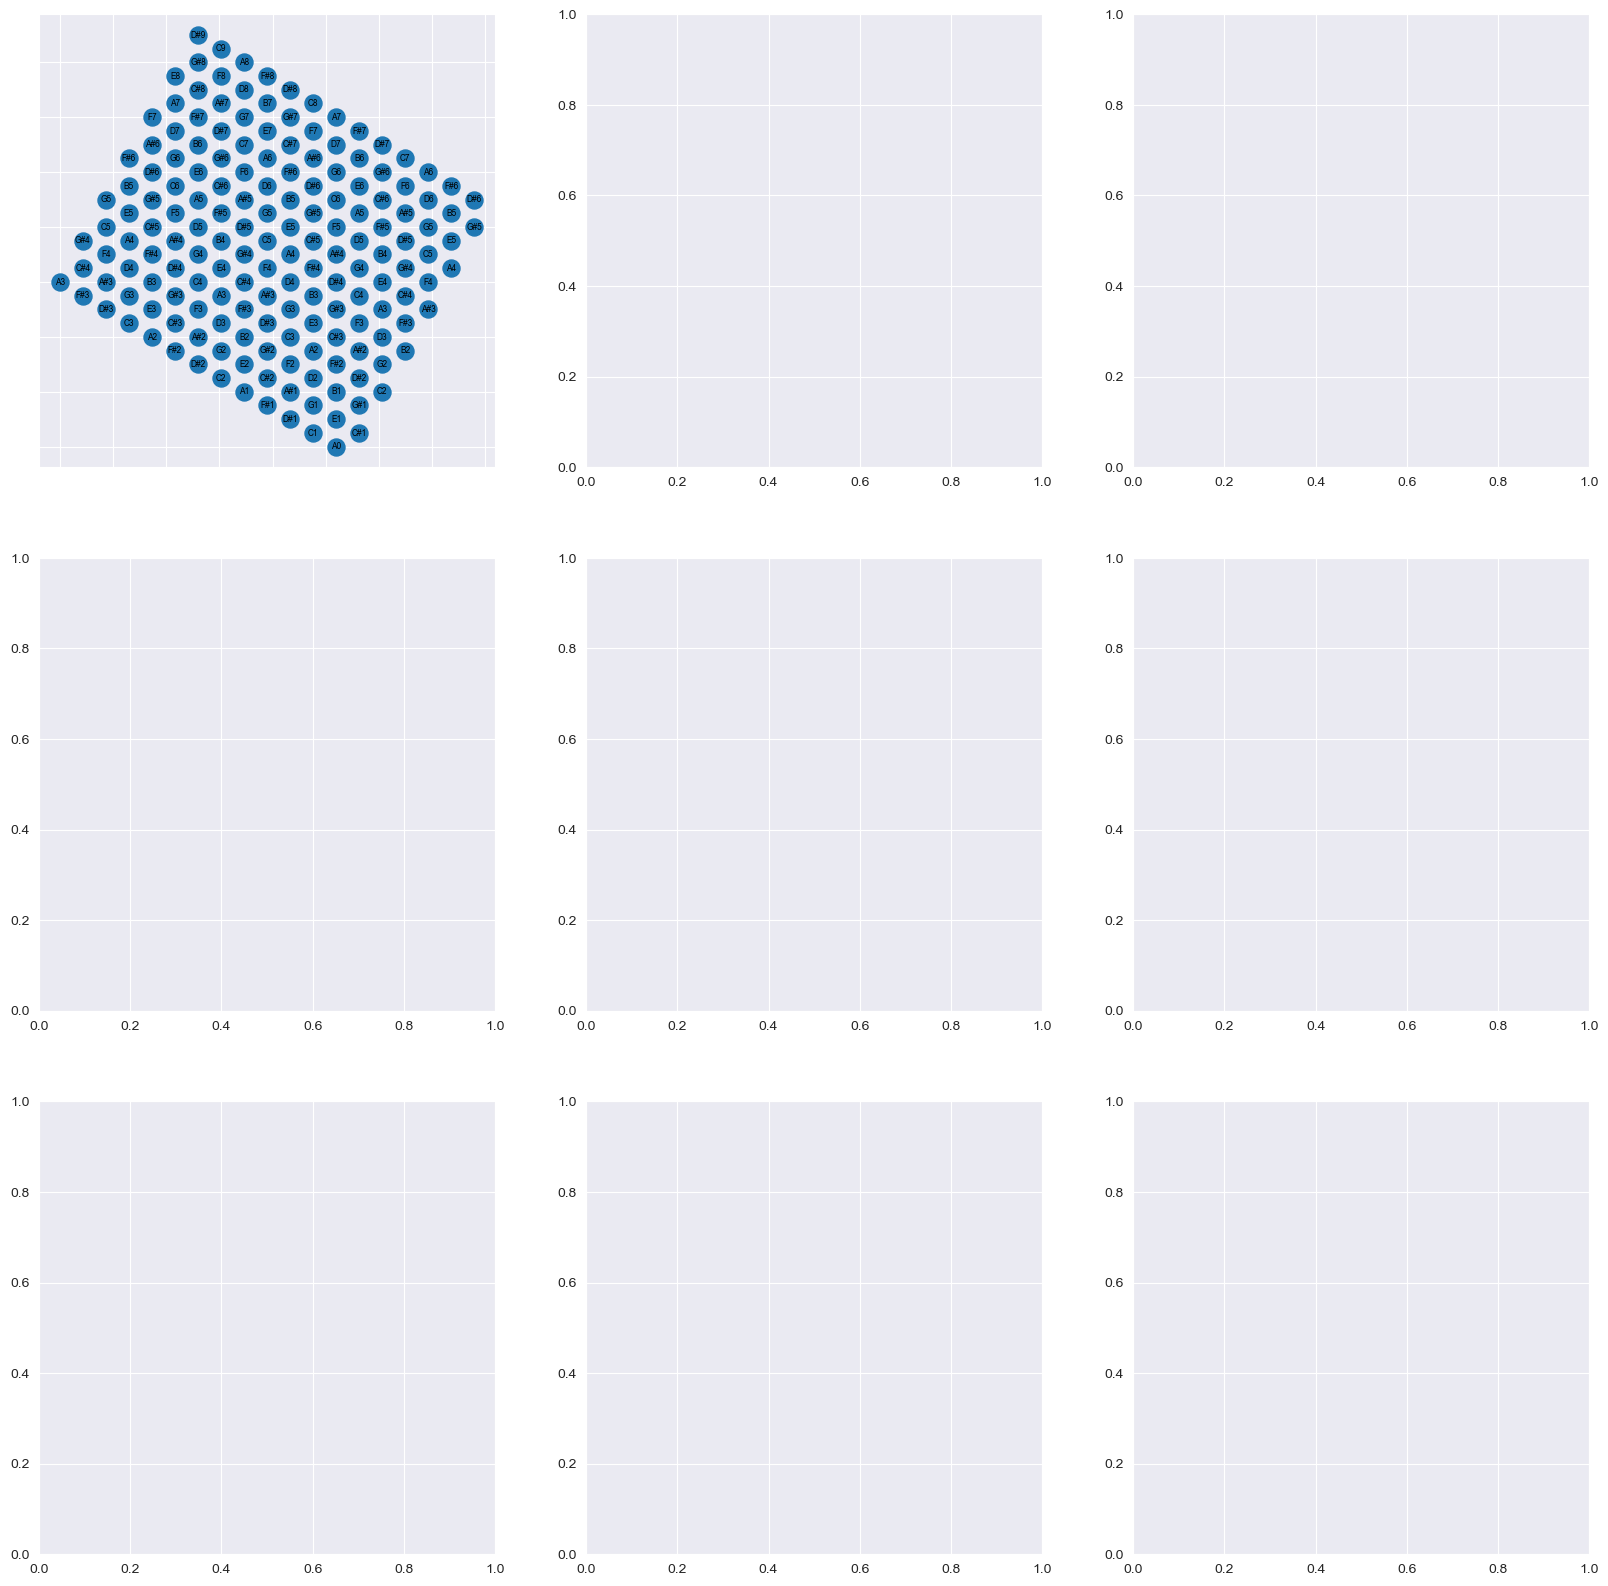

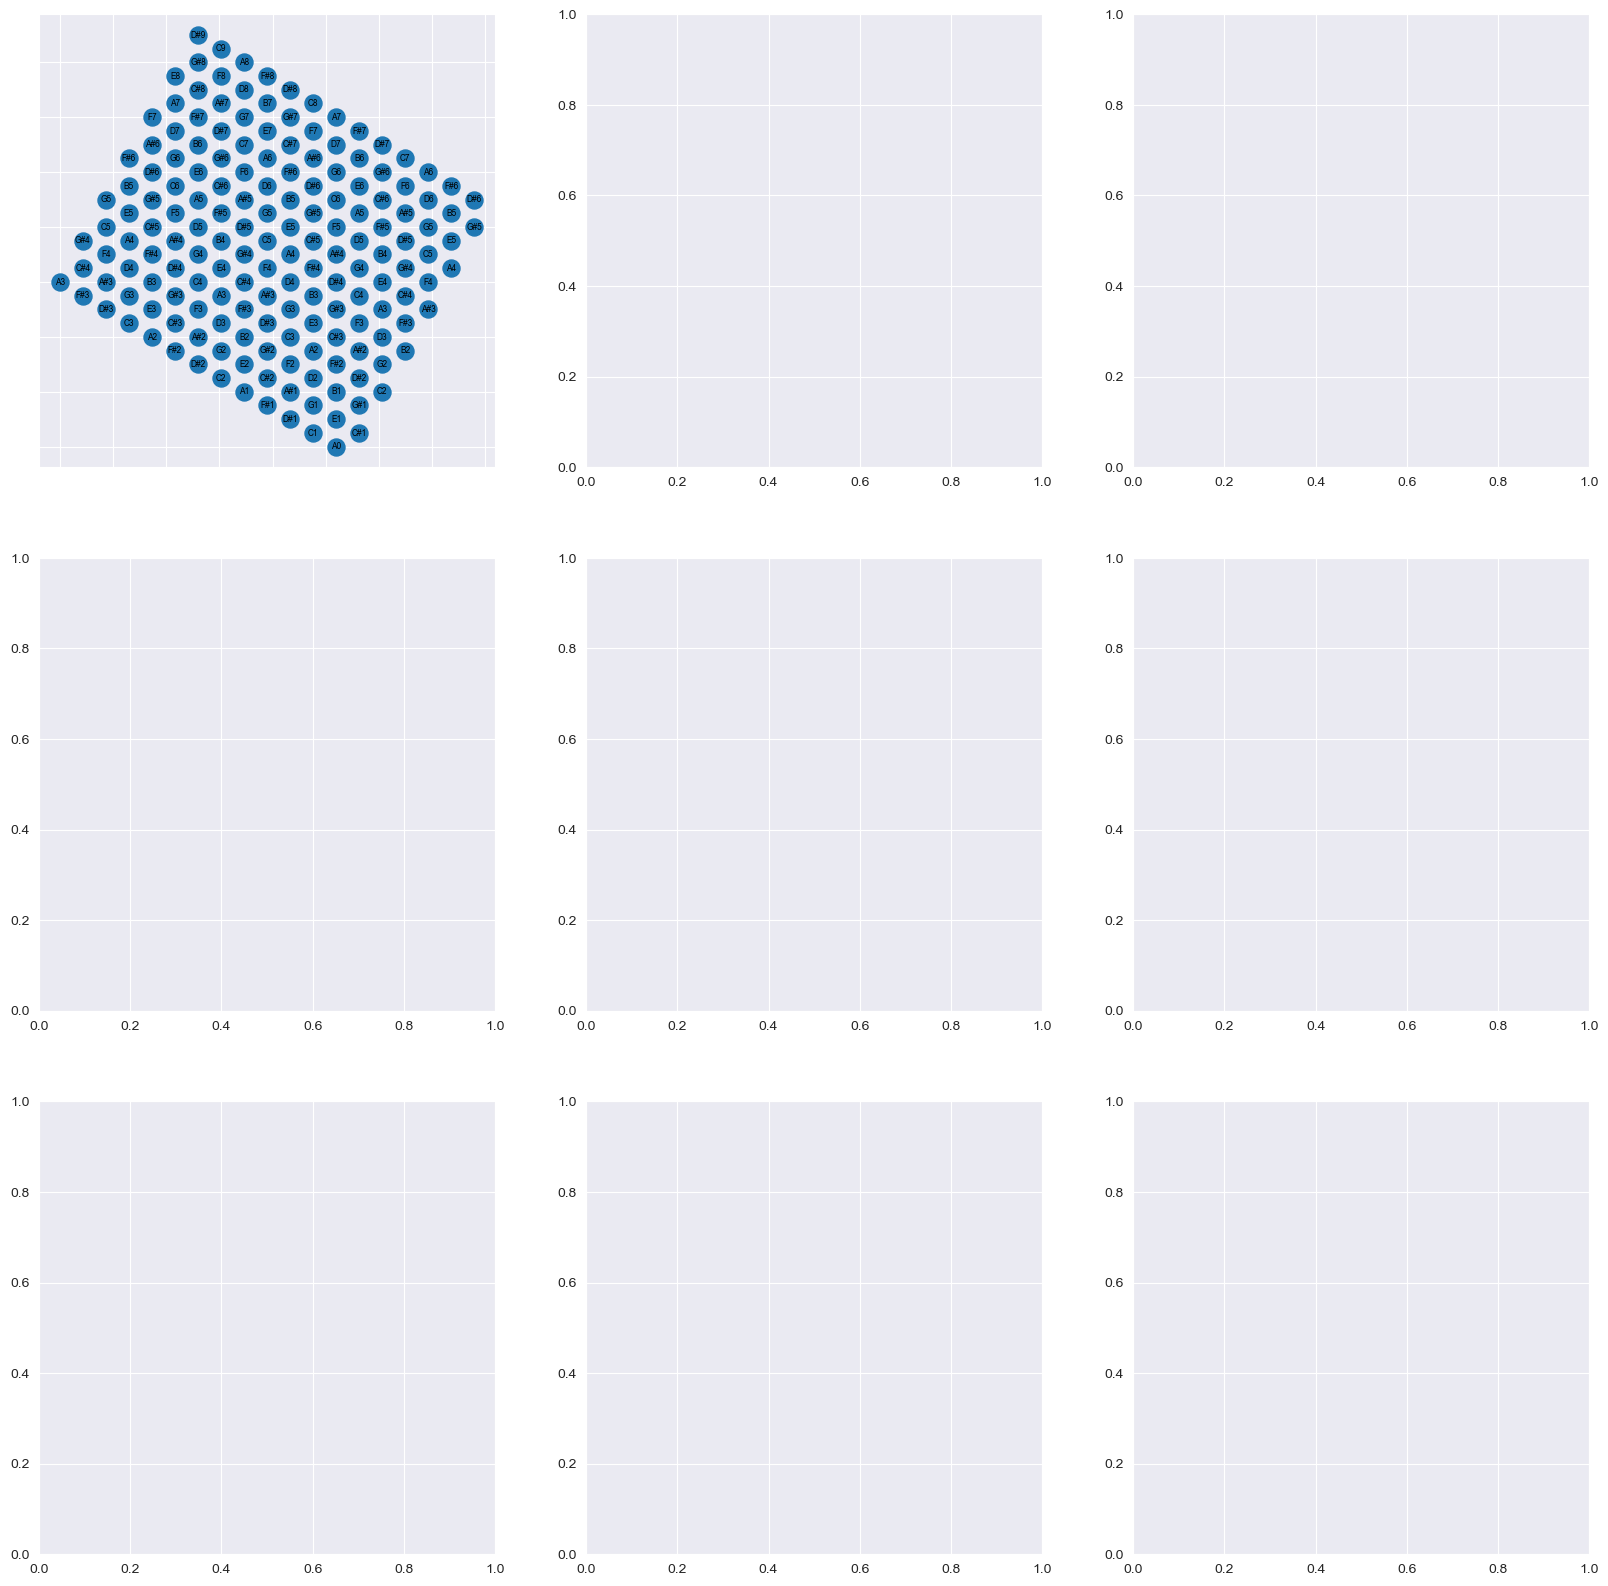

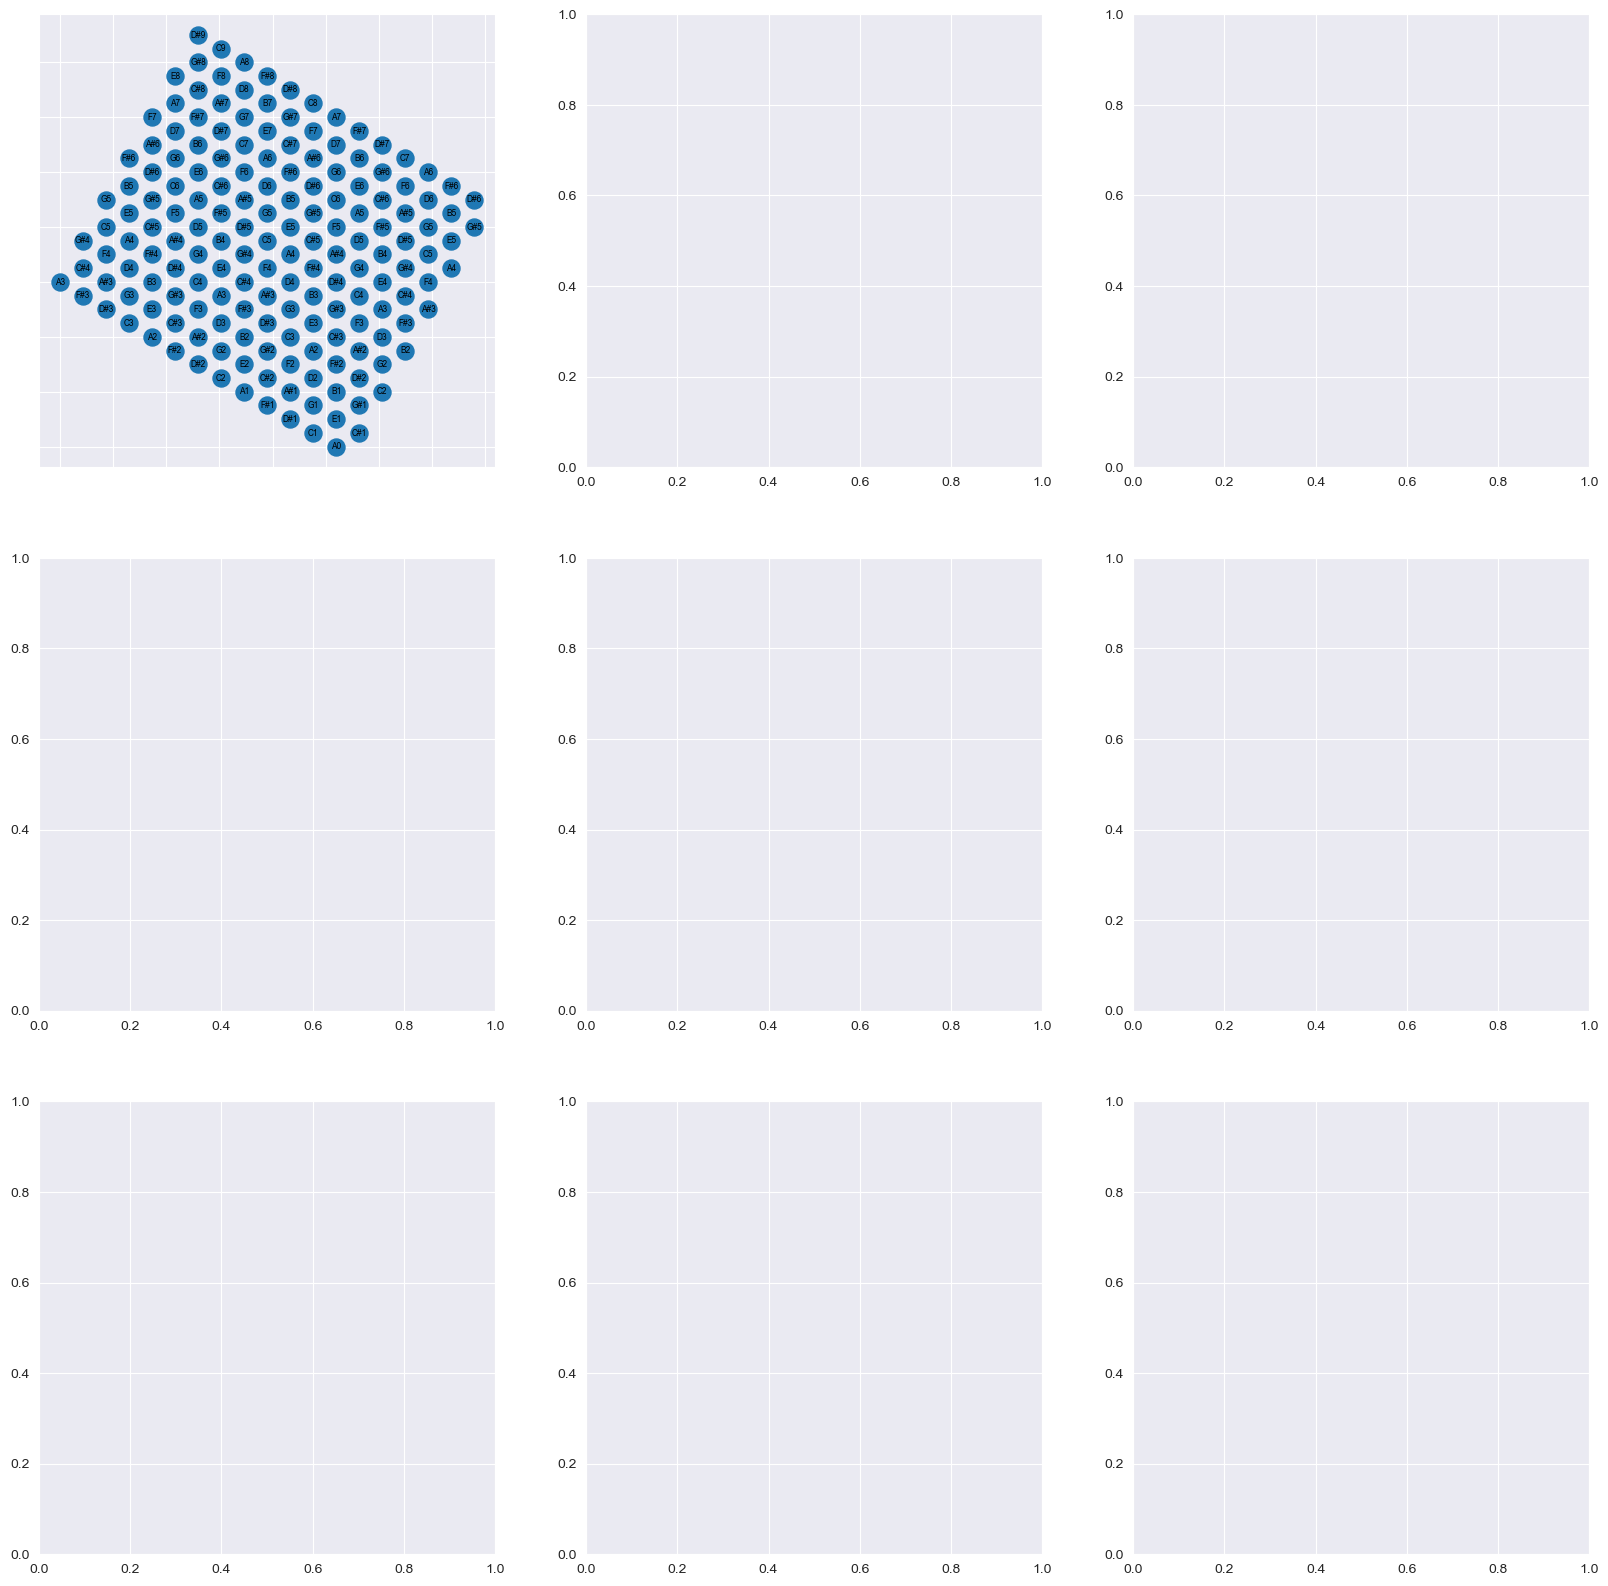

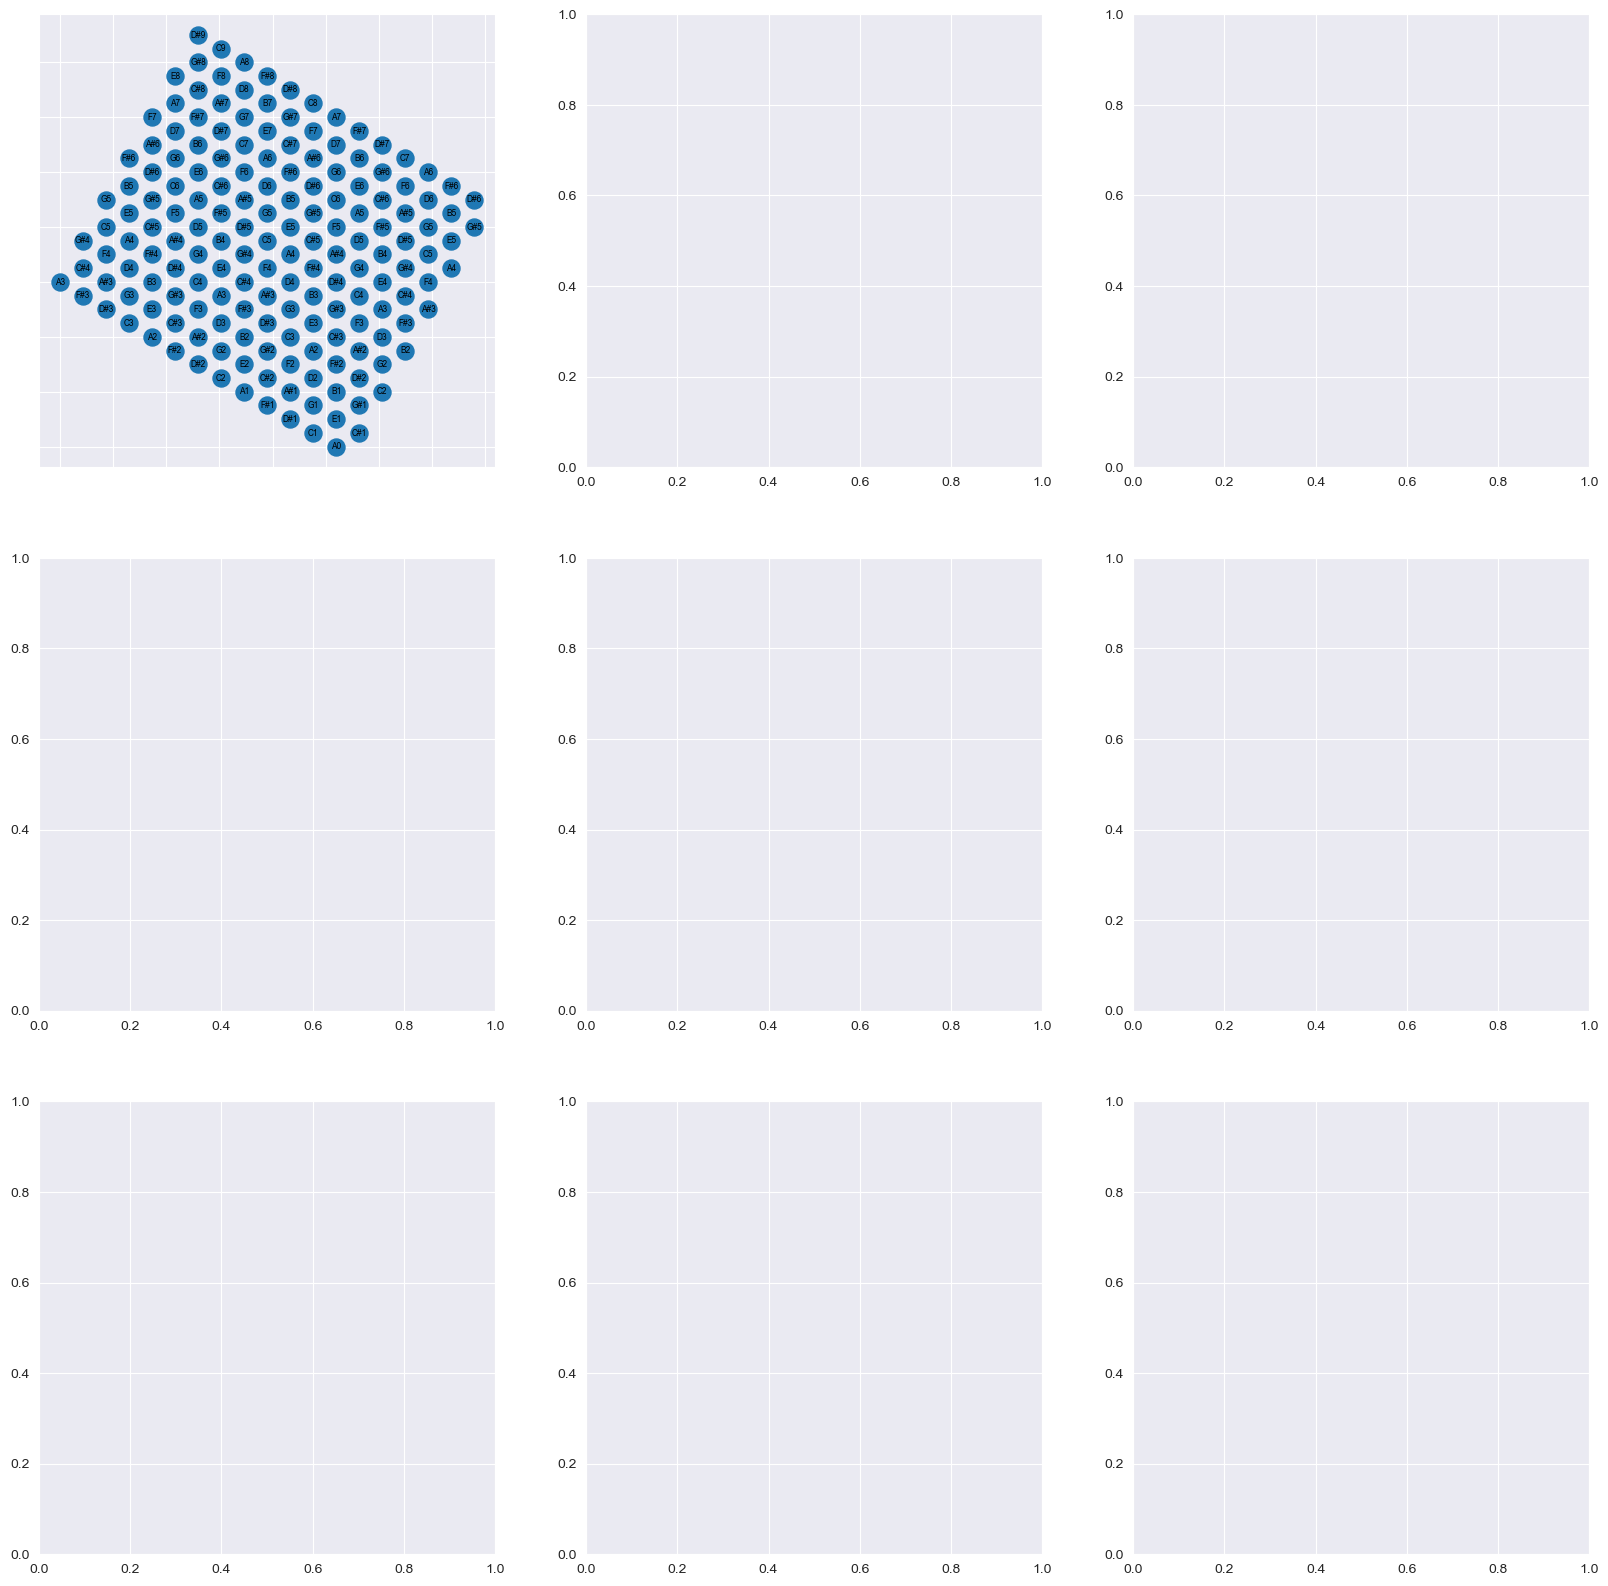

In [15]:
import song, comparison, os, utils

artists = ["ABBA", "Metallica", "AC DC", "The Beatles"]

os.makedirs("analysis", exist_ok=True)
os.makedirs("analysis/songPickles", exist_ok=True)
os.makedirs("analysis/tonnetzImages", exist_ok=True)
os.makedirs("analysis/transformed", exist_ok=True)

# Generates analyzed song files in analysis/songPickles and Tonnetz images in analysis/tonnetzImages
for art in artists:
    song.analyze_artist(art, skip_analyzed=False, tqdm_disable=False)


In [16]:
def get_analyzed_songs_for_artists(artists):
    songs = os.listdir(os.path.join(utils.OUTPUT_ROOT, "songPickles"))
    songs = sorted(songs)
    filtered = []
    for s in songs:
        if not any(s.startswith(a) for a in artists):
            continue
        if not any(c.isdigit() for c in s):
            filtered.append(s[:-7])  # Remove .pickle
    return sorted(filtered)


In [17]:
songs = get_analyzed_songs_for_artists(artists)
print(songs)

['ABBA-Andante, Andante', 'ABBA-Angeleyes', 'ABBA-Another Town, Another Train', 'ABBA-Chiquitita', 'ABBA-Dance (While the Music Still Goes on)', 'ABBA-Dancing Queen', 'ABBA-Does Your Mother Know', 'ABBA-Eagle', 'ABBA-Fernando', 'ABBA-Gimme! Gimme! Gimme!', 'ABBA-Hasta Manana', 'ABBA-Hey, Hey Helen', 'ABBA-Hole In Your Soul', 'ABBA-Honey Honey', 'ABBA-I Am the City', 'ABBA-I Do, I Do, I Do, I Do', 'ABBA-I Wonder (Departure)', "ABBA-I'm a Marionette", 'ABBA-Kisses of Fire', 'ABBA-Knowing Me, Knowing You', 'ABBA-Lay All Your Love on Me', 'ABBA-Like an Angel Passing Through My Room', 'ABBA-Lovers (Live a Little Longer)', 'ABBA-Mamma Mia', 'ABBA-Medley', 'ABBA-Money, Money, Money', 'ABBA-Move On', 'ABBA-My Love My Life', 'ABBA-Name of the Game', 'ABBA-Nina Pretty Ballerina', 'ABBA-Rock Me', 'ABBA-S.O.S', 'ABBA-Summer Night City', 'ABBA-Super Trooper', 'ABBA-Super Trouper', 'ABBA-Take a Chance on Me', 'ABBA-Thank You for the Music', "ABBA-That's Me", 'ABBA-The Visitors', 'ABBA-The Winner Tak

## Similarity Matrix

In [18]:
similarity_matrix, comp = comparison.compute_similarity_matrix(songs, comparison.simple_compare)
# About 10 min

100%|██████████| 398/398 [10:09<00:00,  1.53s/it]


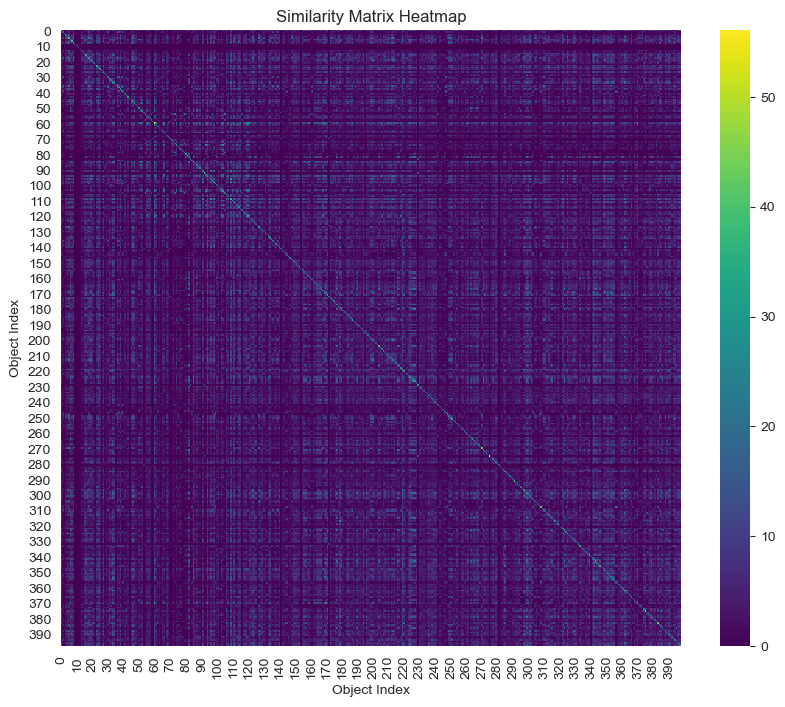

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis')
plt.title("Similarity Matrix Heatmap")
plt.xlabel("Object Index")
plt.ylabel("Object Index")
plt.show()

## Top Song Pairs

In [20]:

pairs = []
n = similarity_matrix.shape[0]
for i in range(n):
    for j in range(i + 1, n):  # Exclude the diagonal and avoid duplicate pairs
        pairs.append(((i, j), similarity_matrix[i, j]))

# Step 3: Sort the Pairs by Similarity Scores
pairs.sort(key=lambda x: x[1], reverse=True)

# Step 4: Print the Top 20 Pairs
top_20_pairs = pairs[:20]
print("Top 20 pairs with the highest similarity scores:")
for pair, score in top_20_pairs:
    print(f"{songs[pair[0]]} / {songs[pair[1]]}, Similarity: {score}")

Top 20 pairs with the highest similarity scores:
Metallica-Carpe Diem Baby / The Beatles-Two of Us, Similarity: 33.639042294734914
The Beatles-I Got a Woman / The Beatles-Little Queenie, Similarity: 30.076803558541943
Metallica-Outlaw Torn / Metallica-The Struggle Within, Similarity: 30.01593891569263
Metallica-One / The Beatles-Two of Us, Similarity: 29.65443275172406
The Beatles-Hippy Hippy Shake / The Beatles-Little Queenie, Similarity: 29.28557270495387
ABBA-Dancing Queen / ABBA-Fernando, Similarity: 28.358144835567035
Metallica-Harvester of Sorrow / Metallica-The Frayed Ends of Sanity, Similarity: 28.26702572219672
Metallica-Carpe Diem Baby / Metallica-Whiplash, Similarity: 28.229476063958234
The Beatles-Don't Pass Me By / The Beatles-Ringo Starr, Similarity: 27.946231002301385
Metallica-No Remorse / Metallica-The Struggle Within, Similarity: 27.839312997792987
The Beatles-Crying, Waiting, Hoping / The Beatles-Searchin, Similarity: 27.26131664484044
The Beatles-Devil in Her Heart 

## Transform Top Songs

In [21]:
import transform

# Outputs .mid files in analysis/transformed
for pair, score in top_20_pairs:
    print(f"{songs[pair[0]]} <- {songs[pair[1]]}")
    transform.transform_songs(
        song.AnalyzedSong(songs[pair[0]]),
        song.AnalyzedSong(songs[pair[1]])
    )
    print()


Metallica-Carpe Diem Baby <- The Beatles-Two of Us
S1: Overdriven Guitar S2: Voice Oohs, Score ((0, 2), 1.357671174402382)
S1: Overdriven Guitar S2: Voice Oohs, Score ((1, 1), 1.2170758242353052)

The Beatles-I Got a Woman <- The Beatles-Little Queenie
S1: Acoustic Guitar (steel) S2: Electric Guitar (clean), Score ((0, 2), 2.176369678639587)
S1: Electric Guitar (clean) S2: Acoustic Guitar (steel), Score ((2, 1), 1.4580668742792688)

Metallica-Outlaw Torn <- Metallica-The Struggle Within
S1: Distortion Guitar S2: Distortion Guitar, Score ((2, 2), 1.5962057112515746)
S1: Choir Aahs S2: Distortion Guitar, Score ((1, 1), 1.0519549346295998)

Metallica-One <- The Beatles-Two of Us
S1: Acoustic Guitar (steel) S2: Voice Oohs, Score ((2, 2), 1.3613188332568136)
S1: Electric Guitar (clean) S2: Fretless Bass, Score ((1, 0), 1.2892401161793565)

The Beatles-Hippy Hippy Shake <- The Beatles-Little Queenie
S1: Electric Guitar (clean) S2: Electric Guitar (clean), Score ((1, 2), 1.9229733306179186)
S

## Influential Artists

In [22]:
import numpy as np
from pprint import pprint

sums = np.sum(similarity_matrix, axis=1)
artist_sums = {}
artist_counts = {}

for i, song in enumerate(songs):
    artist = song.split('-')[0]
    if artist not in artist_sums:
        artist_sums[artist] = 0
        artist_counts[artist] = 0
    artist_sums[artist] += sums[i]
    artist_counts[artist] += 1

MIN_SONGS = 2
artist_avgs = [
    (a, artist_sums[a] / artist_counts[a] / len(songs)) for a in artist_sums if artist_counts[a] > MIN_SONGS
]
artist_avgs = sorted(artist_avgs, key=lambda x: x[1], reverse=True)
pprint(artist_avgs)


[('AC DC', 3.6955726453713114),
 ('The Beatles', 3.5620613037439686),
 ('ABBA', 3.3537049722201373),
 ('Metallica', 3.114194077619748)]
